# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [213]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [214]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [215]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [216]:
vacancies = ['Косметолог', 'Нутрициолог', 'Диетолог', 'Таролог', 'Астролог']

URL = 'https://api.hh.ru/vacancies'

offers = []

for vacancy in vacancies:
  params = {
      'text': vacancy,
      'area': 1,
      'page': 0,
      'per_page': 10
  }

  vacancy_data = requests.get(URL, params).json()
  for page in range(vacancy_data['pages']):
      sleep(0.1)
      params['page'] = page
      data_from_page =requests.get(URL, params).json()
      for offer in data_from_page['items']:
          offers.append(offer)

(1 балл) Посчитайте сколько всего найдено вакансий:

In [217]:
len(offers)

2149

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [218]:
class Company:
    def __init__(self, name, latitude, longitude):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [219]:
companies = list(set(
    Company(
        offer['employer']['name'],
        offer['address']['lat'] if offer['address'] else None,
        offer['address']['lng'] if offer['address'] else None
    )
    for offer in offers
))

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [220]:
located_companies = list(
    filter(lambda company: company.latitude is not None, companies)
)

len(located_companies)

1639

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [221]:
upper_bound = (55.90, 37.40)
lower_bound = (55.60, 37.83)
center = (55.76, 37.61)

def check_nesting(company):
    return (lower_bound[0] <= company.latitude <= upper_bound[0] and
            upper_bound[1] <= company.longitude <= lower_bound[1])

nested_companies = list(filter(check_nesting, located_companies))

len(nested_companies)

1436

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

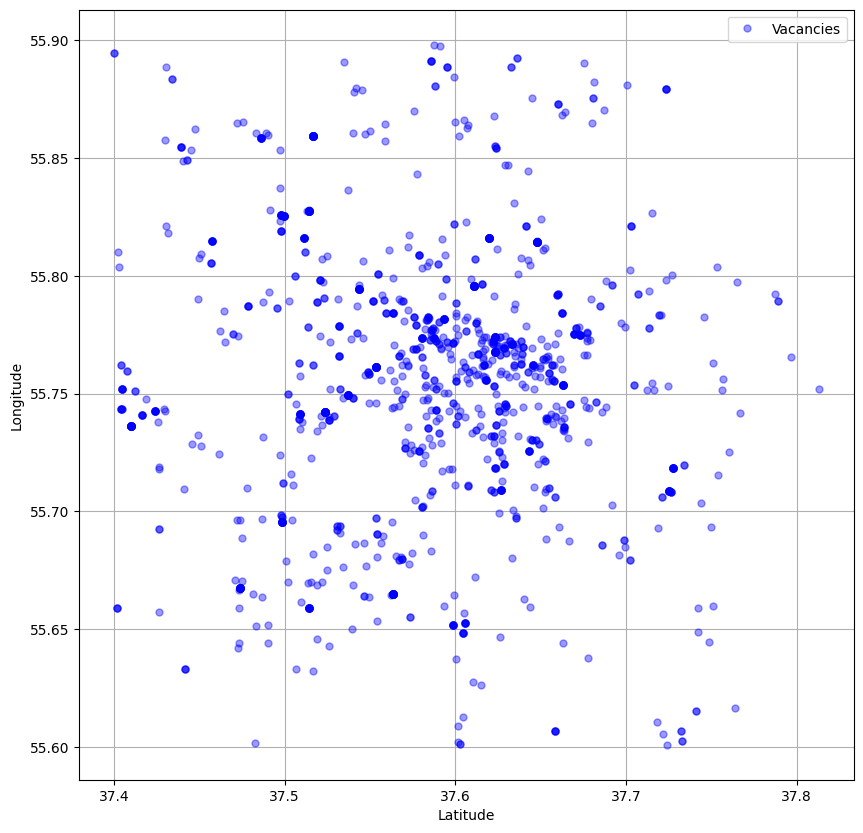

In [222]:
latitudes = [company.latitude for company in nested_companies]
longitudes = [company.longitude for company in nested_companies]

plt.figure(figsize=(10, 10))
plt.plot(
    longitudes,
    latitudes,
    'bo',
    markersize=5,
    alpha=0.4,
    label='Vacancies'
)

plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [223]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scattermapbox(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=dict(
        size=4,
        opacity=0.4,
        color='blue'
    ),
    name='vacancies'
))

fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        center=dict(lat=center[0], lon=center[1]),
        zoom=10
    )
)

fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Вот несколько причин, почему, на мой взгляд, в центре города спрос на профессионалов выбранных профессий может быть выше, чем на окраинах:

1. Более высокий уровень дохода. В центральных районах обычно проживает больше людей с высоким доходом, которые могут позволить себе более внимательно относиться к своему физическому и ментальному здоровью

2. Современные тренды. Жители центра часто следуют модным трендам, в том числе в сфере духовных практик и здорового питания

3. Развитая инфраструктура. В центре лучше транспортная доступность, больше парковок

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [4]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 56.6MB/s]


Создадим DataFrame:

In [5]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [6]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [227]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [7]:
print(str(diamonds['total_sales_price'].idxmax())
      + ' - ' + str(diamonds['total_sales_price'].max()))
print(str(diamonds['total_sales_price'].idxmin())
      + ' - ' + str(diamonds['total_sales_price'].min()))

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [8]:
diamonds[diamonds.isin([None, 'unknown'])].count().sum()

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [9]:
diamonds.columns[(diamonds.isnull().any() | diamonds.isin(['unknown']).any())]

Index(['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition',
       'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity',
       'fancy_color_dominant_color', 'fancy_color_secondary_color',
       'fancy_color_overtone', 'fancy_color_intensity'],
      dtype='object')

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [10]:
cols = diamonds.columns[diamonds.columns.str.startswith('fancy_color_') | diamonds.columns.str.startswith('fluor_')]
cols

Index(['fluor_color', 'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity'],
      dtype='object')

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [11]:
(~diamonds.isin([None, 'unknown'])).sum()[cols].sum()

256727

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [12]:
diamonds.drop(columns=cols, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [13]:
diamonds.drop(
    columns=diamonds.columns[(diamonds.columns.str.startswith('culet_'))],
    inplace=True
)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [14]:
diamonds['total_sales_price'].sum() / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [15]:
diamonds.iloc[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [16]:
diamonds.iloc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [17]:
diamonds.select_dtypes(include='object')

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [18]:
diamonds['total_sales_price'].dot(diamonds['total_sales_price'].T)

158540672665477

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

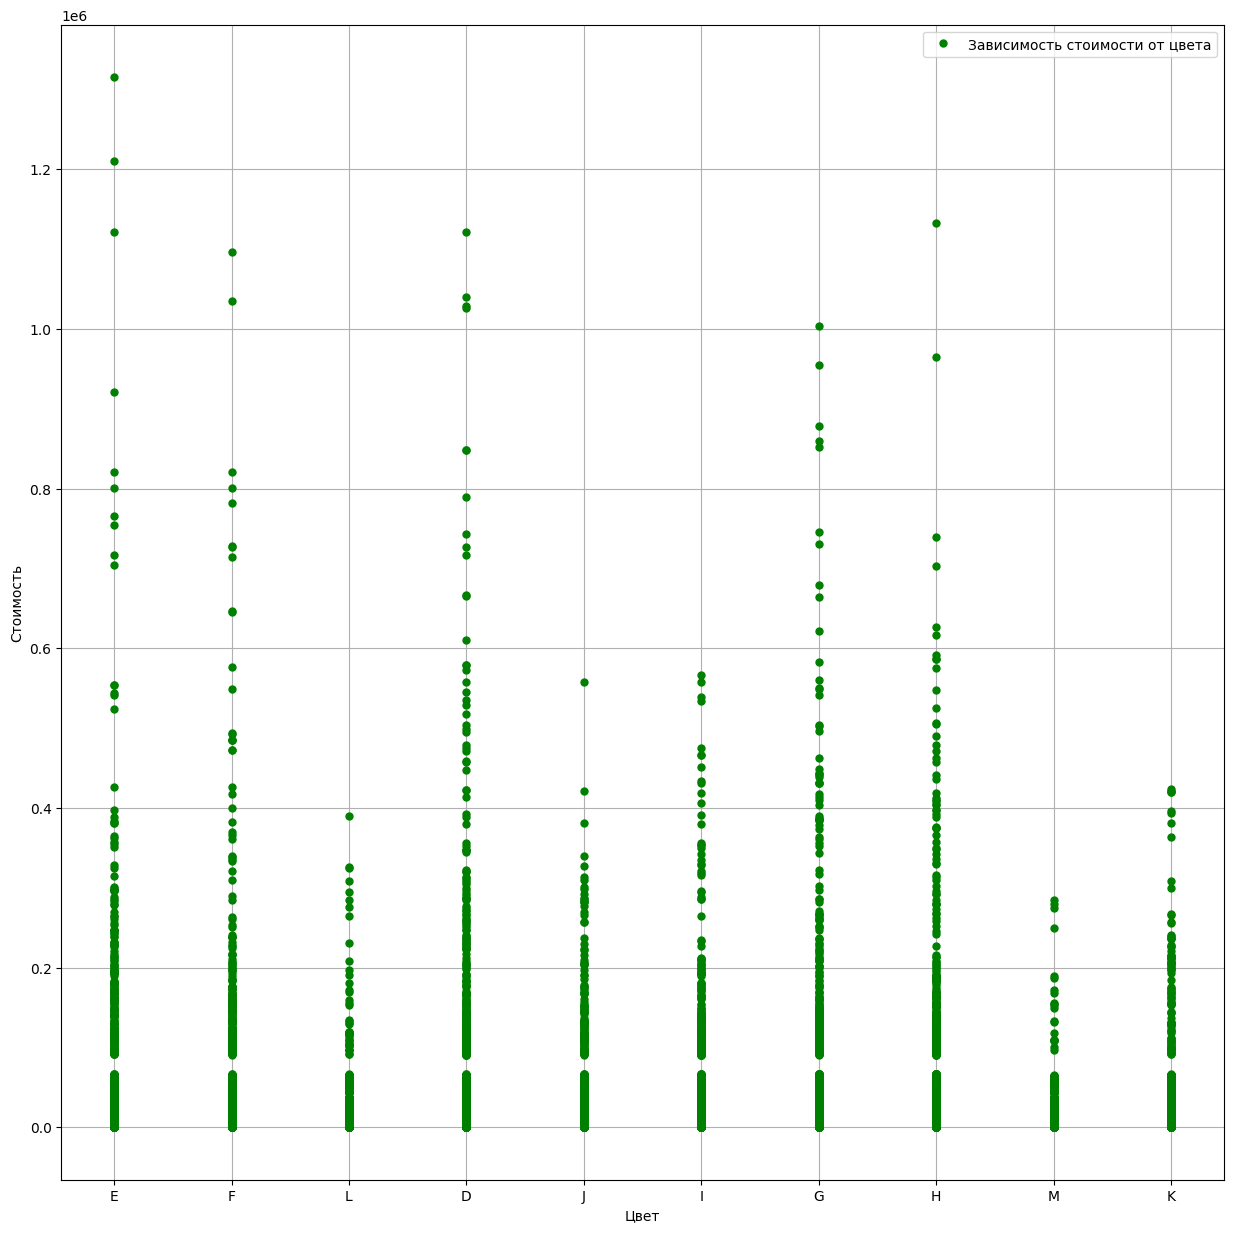

In [19]:
replaced_dataframe = diamonds.replace('unknown', None, inplace=False).dropna(
    subset=['color', 'total_sales_price']
)

plt.figure(figsize=(15, 15))

plt.xlabel('Цвет')
plt.ylabel('Стоимость')

plt.plot(
    replaced_dataframe['color'],
    replaced_dataframe['total_sales_price'],
    'go',
    markersize=5,
    alpha=1.0,
    label='Зависимость стоимости от цвета'
)

plt.legend()
plt.grid(True)
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

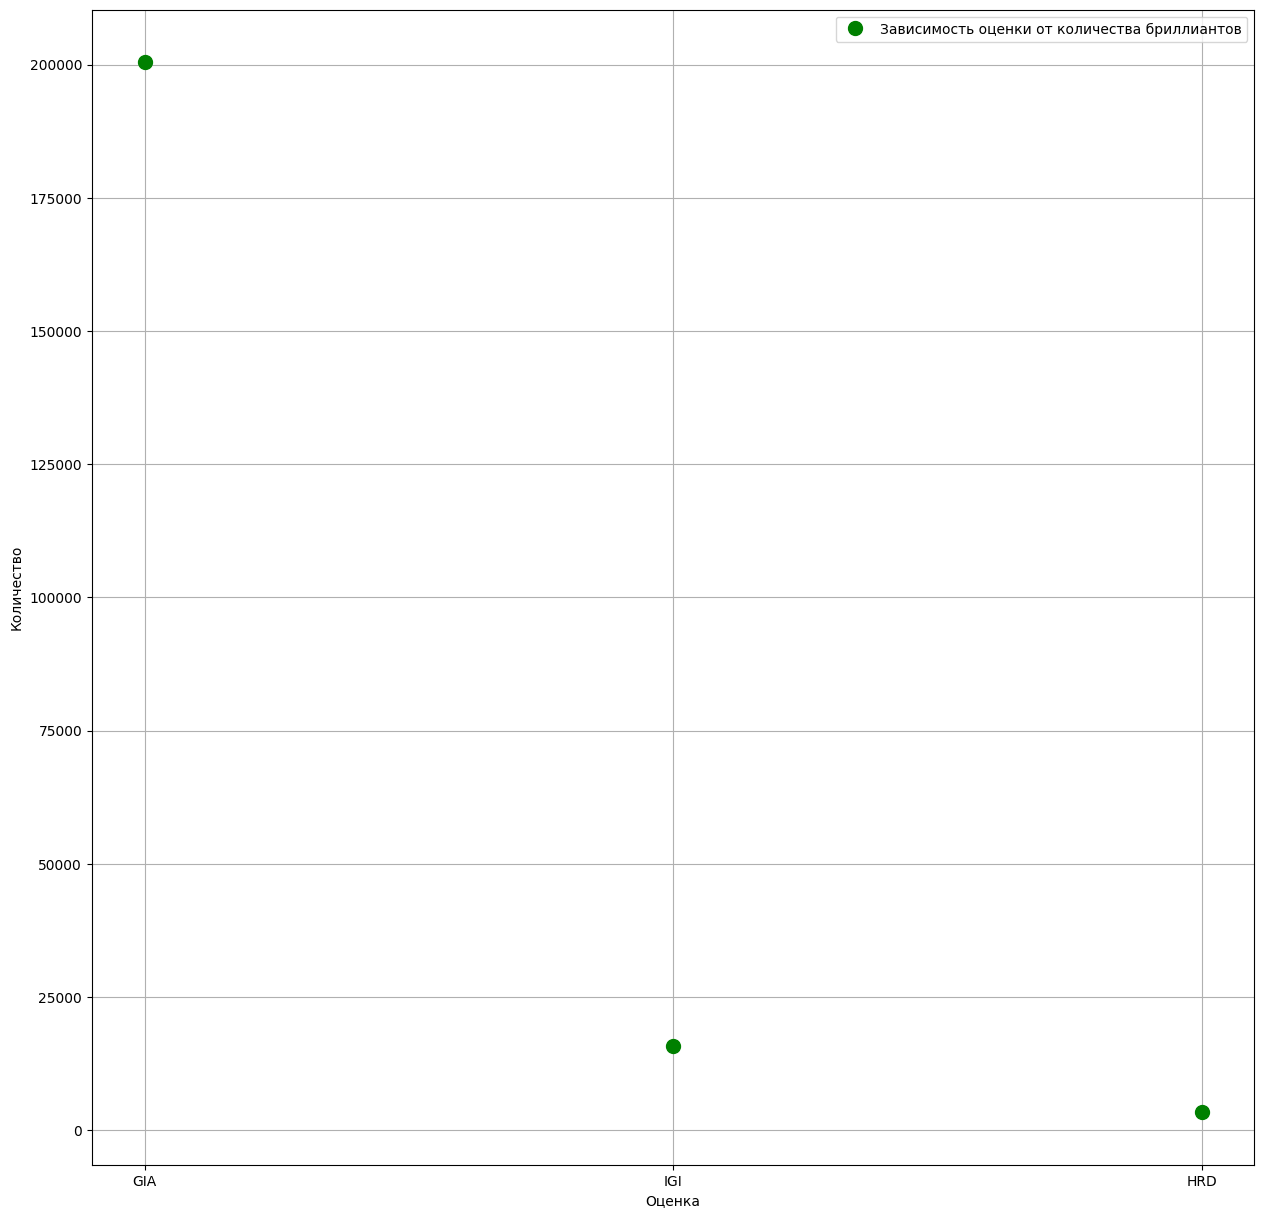

In [20]:
replaced_dataframe = diamonds.replace('unknown', None, inplace=False).dropna(
    subset=['lab']
)

plt.figure(figsize=(15, 15))

plt.xlabel('Оценка')
plt.ylabel('Количество')

plt.plot(
    replaced_dataframe['lab'].value_counts().index,
    replaced_dataframe['lab'].value_counts().values,
    'go',
    markersize=10,
    alpha=1.0,
    label='Зависимость оценки от количества бриллиантов'
)

plt.legend()
plt.grid(True)
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

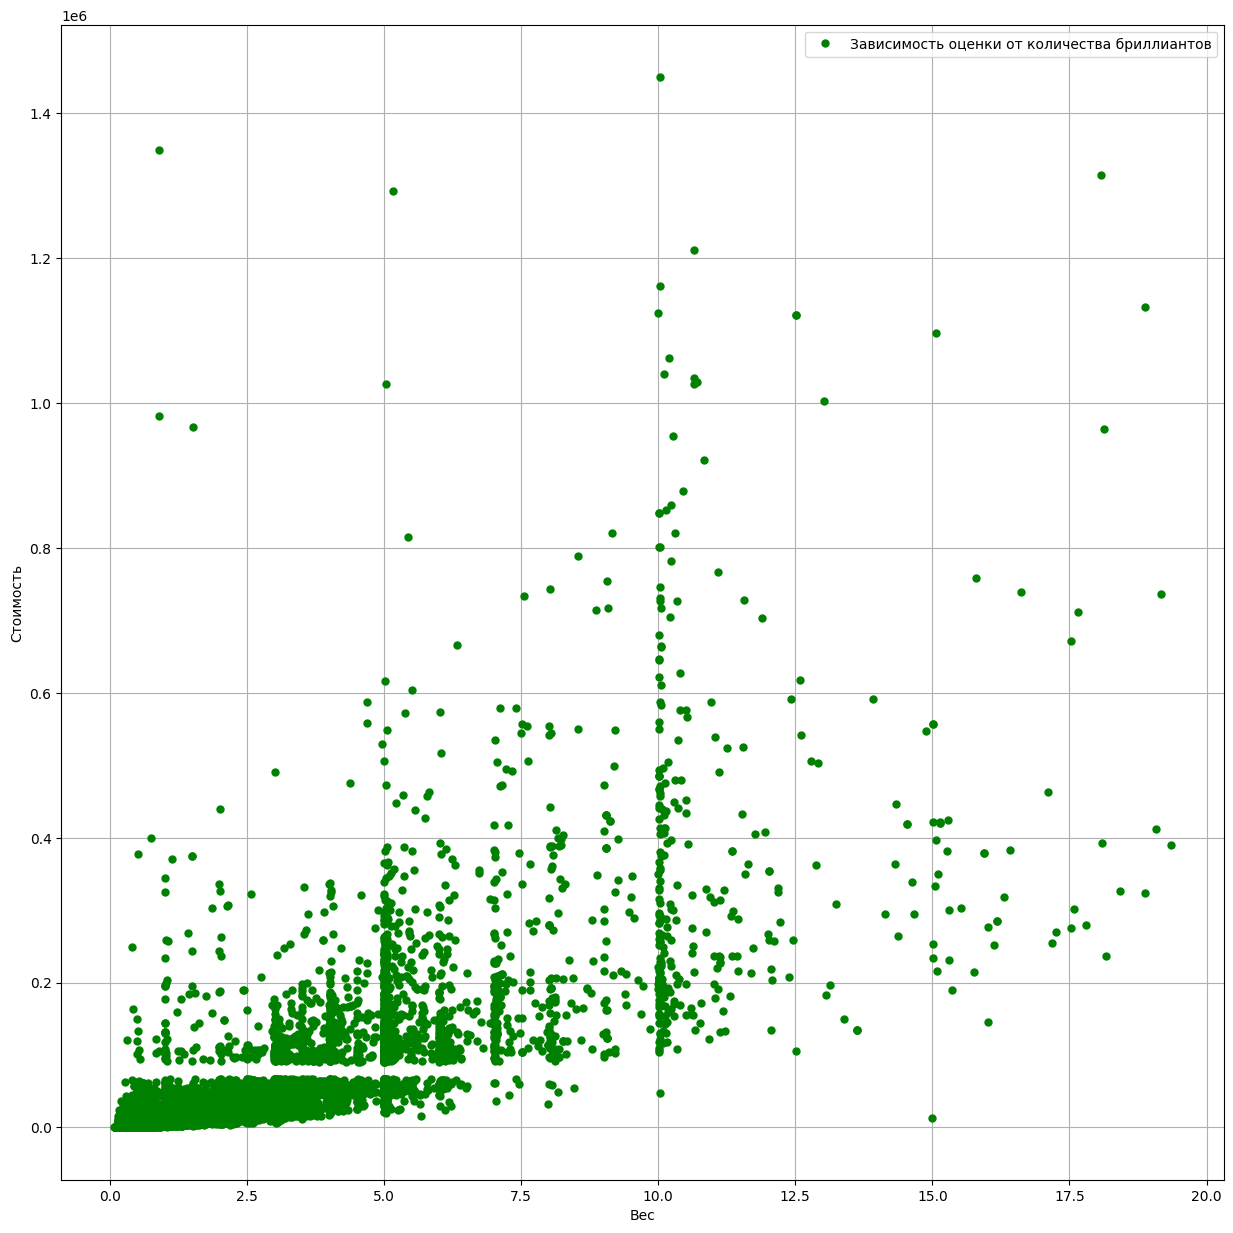

In [22]:
replaced_dataframe = diamonds.replace('unknown', None, inplace=False).dropna(
    subset=['carat_weight', 'total_sales_price']
)

plt.figure(figsize=(15, 15))

plt.xlabel('Вес')
plt.ylabel('Стоимость')

plt.plot(
    replaced_dataframe['carat_weight'],
    replaced_dataframe['total_sales_price'],
    'go',
    markersize=5,
    alpha=1.0,
    label='Зависимость оценки от количества бриллиантов'
)

plt.legend()
plt.grid(True)
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

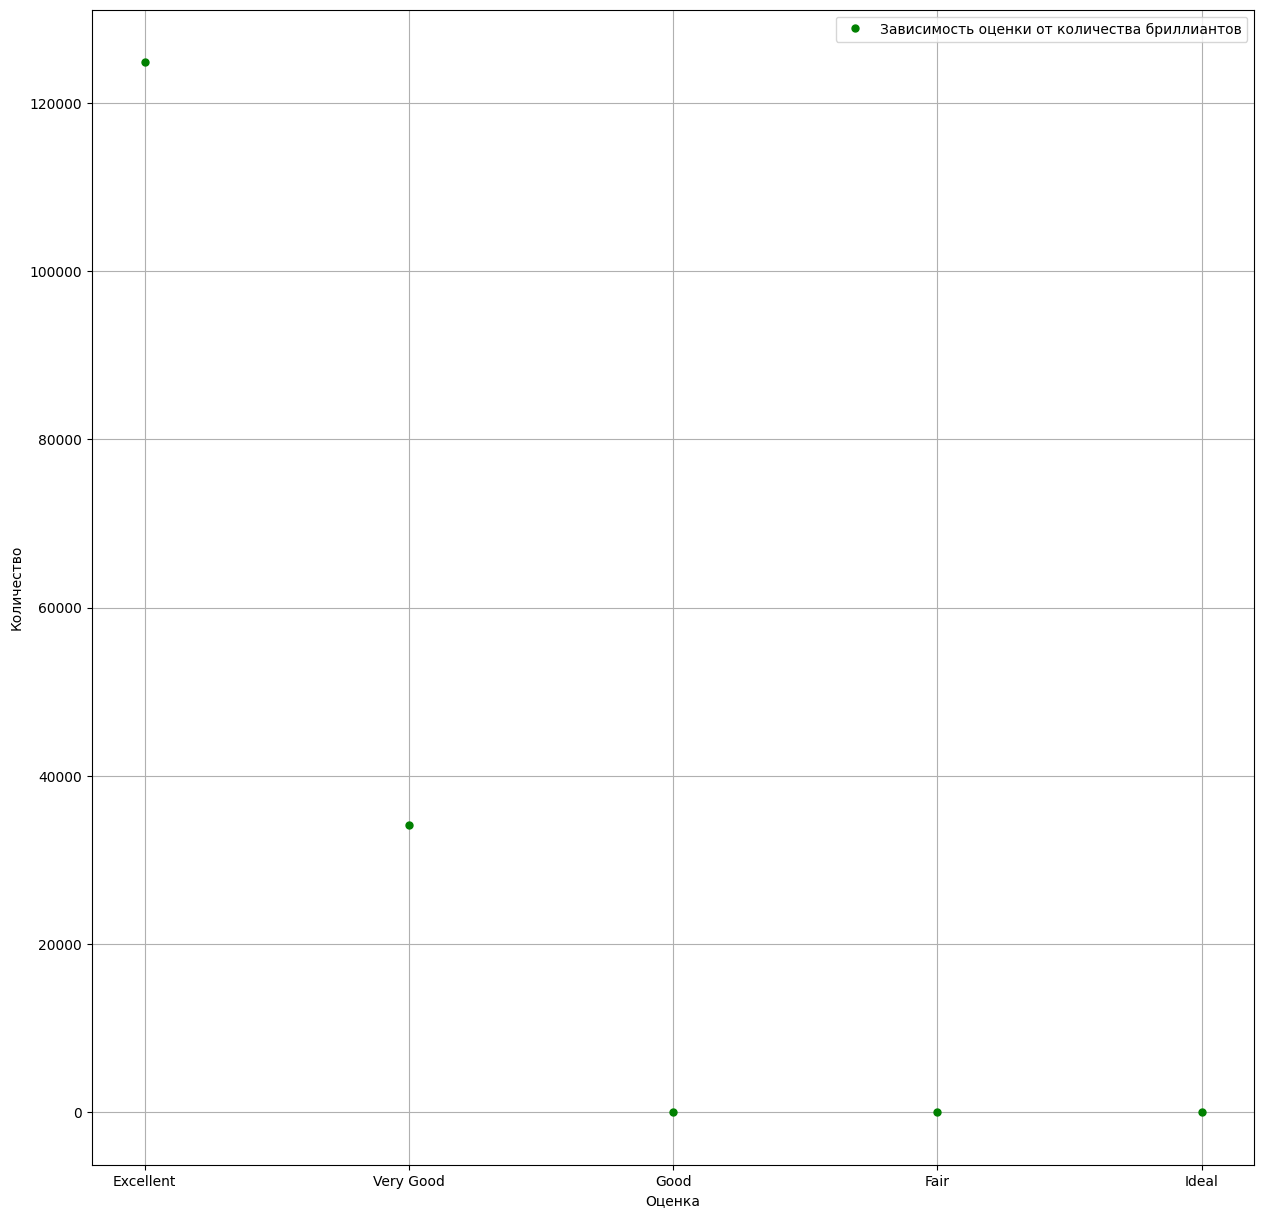

In [245]:
replaced_dataframe = diamonds.replace('unknown', None, inplace=False).dropna(
    subset=['cut_quality']
)

plt.figure(figsize=(15, 15))

plt.xlabel('Оценка')
plt.ylabel('Количество')

plt.plot(
    replaced_dataframe['cut_quality'].value_counts().index,
    replaced_dataframe['cut_quality'].value_counts().values,
    'go',
    markersize=5,
    alpha=1.0,
    label='Зависимость оценки от количества бриллиантов'
)

plt.legend()
plt.grid(True)
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

На основе первого графика можно сказать, что стоимость бриллианта не зависит от его цвета, третий график указывает на то, что стоимость зависит от размера: чем больше размер, тем выше цена

Остальные графики показывают, что чем выше оценка, тем меньше каменей ей соответствуют

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [23]:
picked = diamonds[
    ['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']
]
picked.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [24]:
picked.sample(frac=1).reset_index()

,index,meas_length,meas_width,meas_depth,total_sales_price
0,7938,4.43,3.27,2.25,620
1,197548,7.49,7.53,4.71,14270
2,169790,9.28,6.23,3.85,5876
3,137143,5.47,5.55,3.56,3215
4,152259,6.42,4.78,3.27,3943
...,...,...,...,...,...
219698,100817,4.68,4.74,2.91,1654
219699,173473,6.96,5.05,3.93,6426
219700,157758,5.87,5.93,3.54,4440
219701,106157,7.07,4.37,2.92,1794


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [26]:
picked.loc[:, "minkowski_sum"] = picked.apply(
    lambda row: (row["meas_length"] ** 3 +
                 row["meas_width"] ** 3 +
                 row["meas_depth"] ** 3) ** (1/3),
    axis=1
)

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [27]:
model = picked[['minkowski_sum', 'total_sales_price']]
model

,minkowski_sum,total_sales_price
0,3.745015,200
1,3.748797,200
2,3.775608,200
3,3.754425,200
4,3.694108,200
...,...,...
219698,18.449681,1210692
219699,13.408649,1292500
219700,22.257728,1315496
219701,6.706710,1350000


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [28]:
from sklearn.model_selection import train_test_split
train_part, test_part = train_test_split(model, test_size=0.2)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

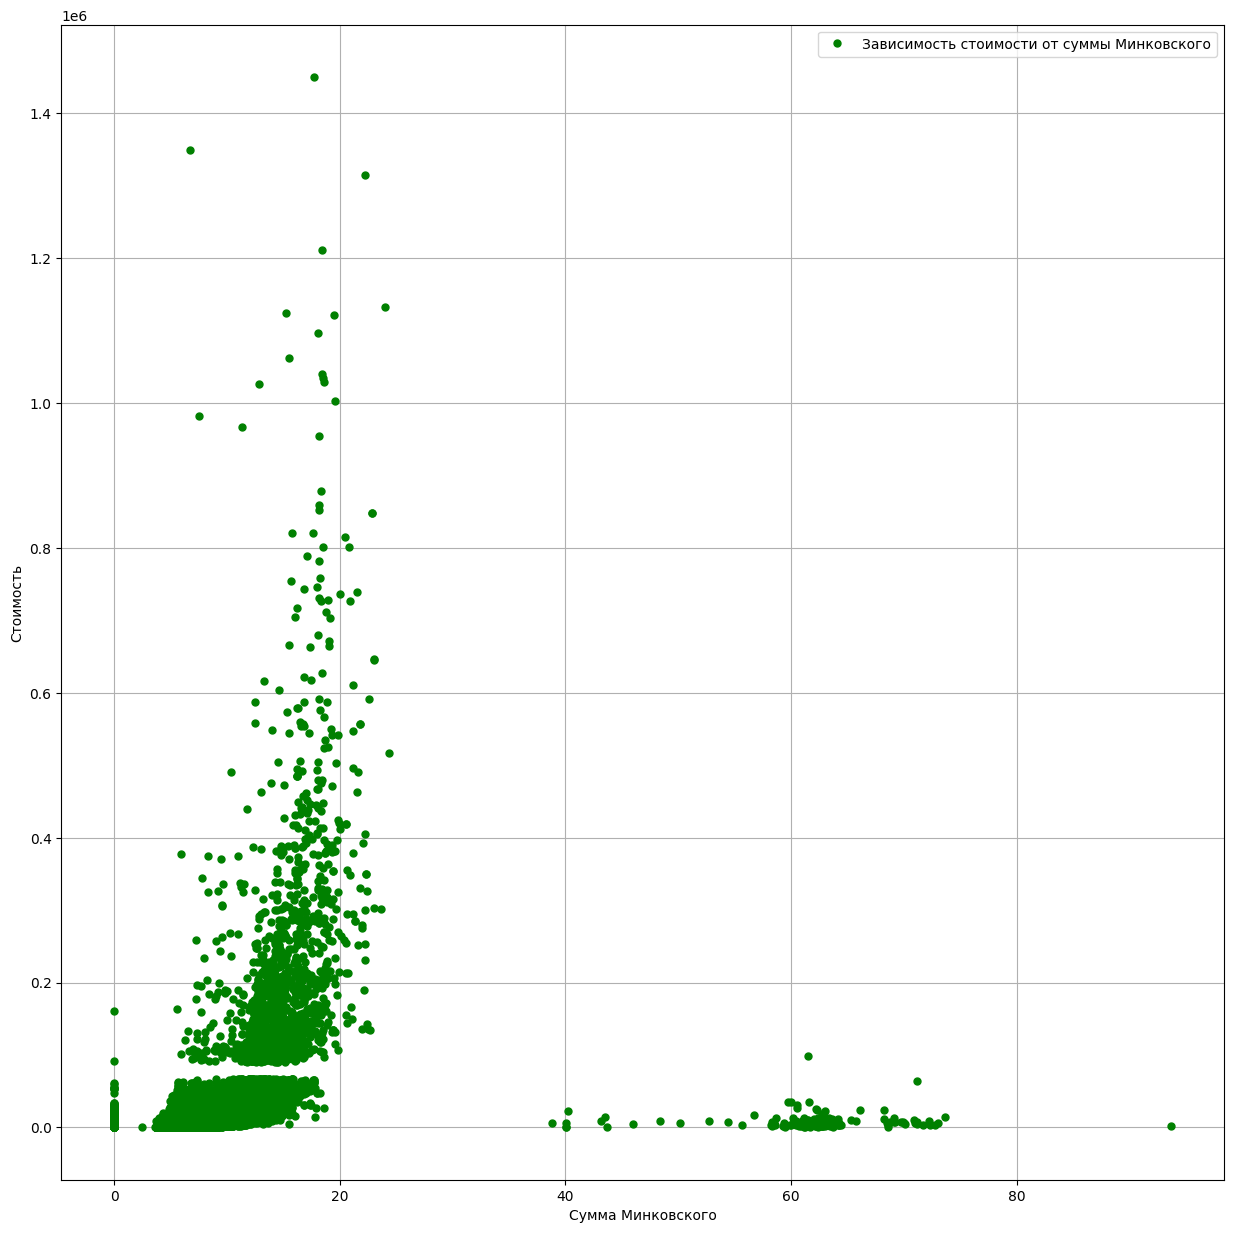

In [30]:
train_replaced = train_part.replace('unknown', None, inplace=False).dropna(
    subset=['minkowski_sum', 'total_sales_price']
)

test_replaced = test_part.replace('unknown', None, inplace=False).dropna(
    subset=['minkowski_sum', 'total_sales_price']
)

plt.figure(figsize=(15, 15))

plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')

plt.plot(
    train_replaced['minkowski_sum'],
    train_replaced['total_sales_price'],
    'go',
    markersize=5,
    alpha=1.0,
    label='Зависимость стоимости от суммы Минковского'
)

plt.legend()
plt.grid(True)
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

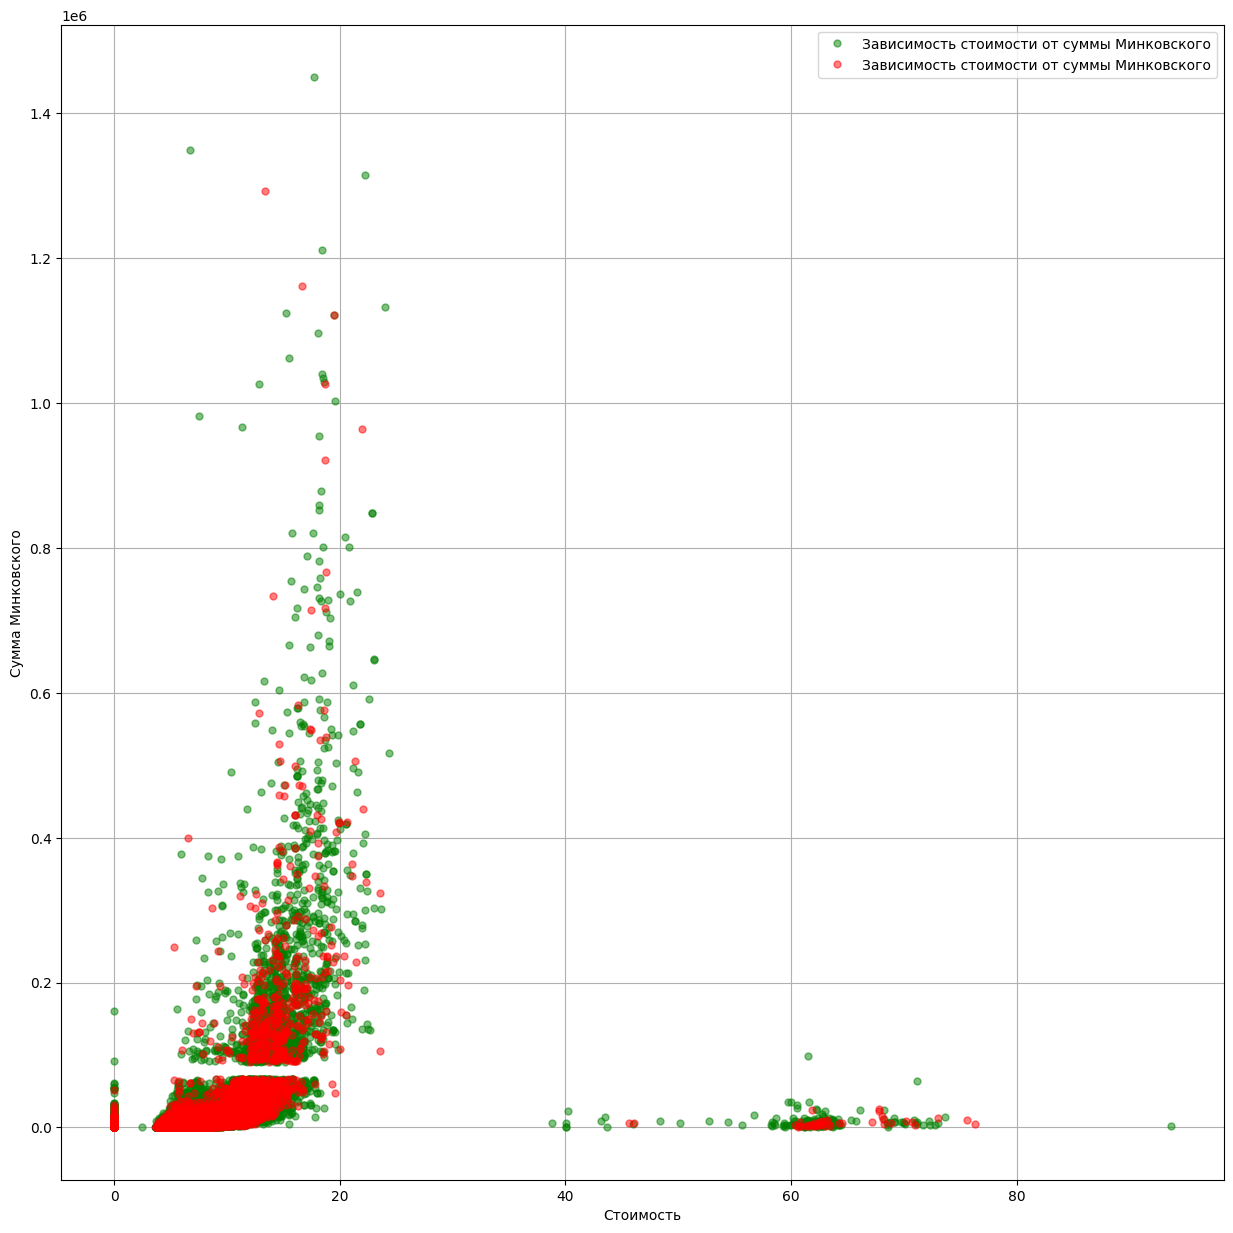

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

plt.xlabel('Стоимость')
plt.ylabel('Сумма Минковского')

plt.plot(
    train_replaced['minkowski_sum'],
    train_replaced['total_sales_price'],
    'go',
    markersize=5,
    alpha=0.5,
    label='Зависимость стоимости от суммы Минковского'
)

plt.plot(
    test_replaced['minkowski_sum'],
    test_replaced['total_sales_price'],
    'ro',
    markersize=5,
    alpha=0.5,
    label='Зависимость стоимости от суммы Минковского'
)

plt.legend()
plt.grid(True)
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [42]:
neighbours = NearestNeighbors(n_neighbors=1).fit(train_replaced)
distances, indices = neighbours.kneighbors(test_replaced)
distances

array([[6.74567443e-04],
       [2.09776672e-02],
       [1.00149745e+00],
       ...,
       [3.04332915e-03],
       [2.28491215e-03],
       [2.83474498e-03]])

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [60]:
max(
    abs(
        test_replaced.iloc[i]['total_sales_price'] -
        train_replaced.iloc[indices[i][0]]['total_sales_price']
    ) /
    test_replaced.iloc[i]['total_sales_price']
    for i in range(len(test_replaced))
)


0.03869969040247678

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [36]:
from sklearn.preprocessing import OneHotEncoder

diamonds_replaced = diamonds.replace('unknown', None, inplace=False).dropna(
    subset=['lab', 'clarity'])
diamonds_replaced.reset_index()
circumcised_diamonds = replaced_diamonds[['lab', 'clarity']]

encoder = OneHotEncoder(sparse_output=False)
dataframe_encoder = pd.DataFrame(
    encoder.fit_transform(circumcised_diamonds),
    columns=encoder.get_feature_names_out(['lab', 'clarity'])
)
encoded_df

,lab_GIA,lab_HRD,lab_IGI,clarity_I1,clarity_I2,clarity_I3,clarity_IF,clarity_SI1,clarity_SI2,clarity_SI3,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
219699,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
219700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
219701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    dataframe_encoder,
    diamonds['total_sales_price'],
    test_size=0.2
)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [38]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [39]:
from sklearn.metrics import mean_squared_error
ans = model.predict(X_test)
mean_squared_error(y_test, ans)

722209699.0840751

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Высокое отклонение говорит о том, что двух признаков явно мало для хорошей оценки (были использованы чистота бриллианта и лабораторная оценка), но грубую прикидку получить все же можно